# Lesson 3: NumPy and Pandas for 2D Data

## 04 - Two-Dimensional NumPy Arrays
- 2D arrays as opposed to array of arrays
    - More memory efficient as explained [here](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#internal-memory-layout-of-an-ndarray)
    - Accessing elements is different `a[1, 3]` vs. `a[1][3]`

Exercise for getting familiar with arrays

In [1]:
import numpy as np
import pandas as pd

In [2]:
#ridership for 10 days across 5 stations
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [3]:
print ridership[1, 3]
print ridership[1:3, 3:5]
print ridership[1, :]

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [4]:
print ridership[0, :] + ridership[1, :]
print ridership[:, 0] + ridership[:, 1]

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [5]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

a + b

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [6]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_station_first_day = ridership[0, :].argmax()
    print max_station_first_day
    
    overall_mean = ridership.mean()
    mean_for_max = ridership[:, max_station_first_day].mean()
    
    return (overall_mean, mean_for_max)

In [7]:
mean_riders_for_max_station(ridership)

3


(2342.5999999999999, 3239.9000000000001)

## 06 - NumPy Axis
![](axis.png)

In [8]:
a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])

In [9]:
print a.sum()
print a.sum(axis=0)
print a.sum(axis=1)

45
[12 15 18]
[ 6 15 24]


Exercise for finding the min and max riders per day

In [10]:
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    
    mean_ridership = ridership.mean(axis = 0)
    
    max_daily_ridership = mean_ridership.max()
    min_daily_ridership = mean_ridership.min()
    
    return (max_daily_ridership, min_daily_ridership)

In [11]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

## 08 - NumPy and Pandas Data Types

In [12]:
enrollments_df = pd.DataFrame({
        'account_key': [448, 448, 448],
        'status': ['canceled', 'canceled', 'canceled'],
        'days_to_cancel': [65, 5, 0]
    })

In [13]:
enrollments_df

,account_key,days_to_cancel,status
0,448,65,canceled
1,448,5,canceled
2,448,0,canceled


In [14]:
enrollments_df.mean()

account_key       448.000000
days_to_cancel     23.333333
dtype: float64

## 09 - Accessing Elements of a DataFrame

In [15]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [16]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


We can access the data from a data frame using many ways. 

By row index

In [17]:
ridership_df.loc['05-02-11']

R003    1478
R004    3877
R005    3674
R006    2328
R007    2539
Name: 05-02-11, dtype: int64

By position

In [18]:
ridership_df.iloc[9]

R003    1342
R004    4043
R005    4009
R006    4665
R007    3033
Name: 05-10-11, dtype: int64

By row and column position

In [19]:
ridership_df.iloc[0, 3]

5

By row index and column names

In [20]:
ridership_df.loc['05-04-11', 'R004']

3392

In [21]:
ridership_df['R004']

05-01-11       0
05-02-11    3877
05-03-11    4088
05-04-11    3392
05-05-11    4802
05-06-11    3933
05-07-11     229
05-08-11       0
05-09-11    3785
05-10-11    4043
Name: R004, dtype: int64

We can get the underlying array

In [22]:
ridership_df.values

array([[   0,    0,    2,    5,    0],
       [1478, 3877, 3674, 2328, 2539],
       [1613, 4088, 3991, 6461, 2691],
       [1560, 3392, 3826, 4787, 2613],
       [1608, 4802, 3932, 4477, 2705],
       [1576, 3933, 3909, 4979, 2685],
       [  95,  229,  255,  496,  201],
       [   2,    0,    1,   27,    0],
       [1438, 3785, 3589, 4174, 2215],
       [1342, 4043, 4009, 4665, 3033]])

In [23]:
ridership_df.values.mean()

2342.5999999999999

In [24]:
#Creating data frame using list of lists
pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])

,A,B,C
0,0,1,2
1,3,4,5


In [25]:
# Accessing multiple columns
ridership_df[['R003', 'R005']]

,R003,R005
05-01-11,0,2
05-02-11,1478,3674
05-03-11,1613,3991
05-04-11,1560,3826
05-05-11,1608,3932
05-06-11,1576,3909
05-07-11,95,255
05-08-11,2,1
05-09-11,1438,3589
05-10-11,1342,4009


Let us re write a function that we had written earlier for numpy arrays for data frames.

In [26]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_station_first_day = ridership.iloc[0].argmax()
    
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[max_station_first_day].mean()
    
    return (overall_mean, mean_for_max)

In [27]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

## 11 - Loading Data into a DataFrame

In [28]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [29]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [30]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## 12 - Calculating Correlation (Pearson's r)
- Standardize each variable
- Multiply each pair of values and take the average
- If variables are spread in y direction
    ![](spread_y.png)
- then standardizing spreads them more in the x direction
    ![](spread_in_x.png)
- subtracting mean causes it be divided in 4 parts
    ![](divide_axis_4parts.png)

- Measured by average of (x in std units) * (y in std units)
- Can range from -1 to +1
- For calculating Pearson's r it is important that you take uncorrected standard deviation
- By default, Pandas' `std()` function computes the standard deviation using [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). Calling `std(ddof=0)` ensures that Bessel's correction will not be used.
- [This page](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html) contains some scatterplots of variables with different values of correlation.
- [This page](http://rpsychologist.com/d3/correlation/) lets you use a slider to change the correlation and see how the data might look.
- Pearson's r only measures linear correlation! [This image](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg) shows some different linear and non-linear relationships and what Pearson's r will be for those relationships.

In [31]:
def standardize_1D(x):
    return (x - x.mean()) / x.std(ddof = 0)

def correlation(x, y):
    return (standardize_1D(x) * standardize_1D(y)).mean()

In [32]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.03564851577223041

This correlation is not very strong. So mean precipitation affects hourly entries but not too much.

In [33]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.5858954707662182

This correlation is stronger as we do expect cumulative entries to be related to hourly entries.

## 14 - Pandas Axis Names

![](axis_names.png)

## 15 - DataFrame Vectorized Operations

In [34]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

entries_and_exits

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [35]:
# Adding DataFrames with the column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print df1 + df2

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [36]:
# Adding DataFrames with overlapping column names 
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print df1 + df2

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [37]:
# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                   index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                   index=['row4', 'row3', 'row2'])
print df1 + df2

         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


Documentation for the Pandas shift() function is [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)

In [38]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)

In [39]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [40]:
entries_and_exits.diff()

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## 17 - DataFrame applymap
![](applymap.png)

In [41]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1

df.applymap(add_one)

,a,b,c
0,2,11,6
1,3,21,11
2,4,31,16


In [42]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [43]:
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convert_grade(num):
        if num >= 90:
            return 'A'
        elif num >= 80:
            return 'B'
        elif num >= 70:
            return 'C'
        elif num >= 60:
            return 'D'
        else:
            return 'F'
    return grades.applymap(convert_grade)

In [44]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## 19 - DataFrame apply

- Maps column to column
- This may be required when your result depends on the rest of the values. Say top 10% students get 'A' grade. For this we need to find what is the value of the rest of the students

![](apply.png)

In [45]:
def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])

# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print convert_grades_curve(grades_df['exam1'])

# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately
print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [46]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_1D)

In [47]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


Here as we know the score of all students hence we used `ddof = 0` in case of `standardize_1D` as we don't want Bessel's correction.

Another use case of `apply` would be when we want to convert a column into a single value rather than a new column. e.g. when we need to find the max value in a column

![](apply2.png)

Exercise to find the 2nd largest value in a data frame

In [48]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

df

,a,b,c
0,4,20,25
1,5,10,20
2,3,40,5
3,1,50,15
4,2,30,10


In [49]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending = False)
    return sorted_column.iloc[1]

In [50]:
second_largest_in_column(df['a'])

4

In [51]:
def second_largest(df):
    return df.apply(second_largest_in_column)

In [52]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

## 23 - Adding a DataFrame to a Series

In [53]:
# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [54]:
# Adding a Series to a one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print df
print '' # Create a blank line between outputs
print df + s

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [55]:
# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print df
print '' # Create a blank line between outputs
print df + s

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [56]:
df.add(s, axis = 'index')

,0
0,11
1,22
2,33
3,44


In [57]:
# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [58]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4], index = ['b', 'c', 'd', 'e'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a     b      c      d   e
0 NaN  51.0   92.0  133.0 NaN
1 NaN  61.0  102.0  143.0 NaN
2 NaN  71.0  112.0  153.0 NaN
3 NaN  81.0  122.0  163.0 NaN


## 25 - Standardizing Each Column Again

In [59]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [60]:
#Standardize each column
(grades_df - grades_df.mean()) / grades_df.std()

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


To standardize each row is a little bit trickier. So we will break it into parts

In [61]:
#Find the mean of each row
mean_rows = grades_df.mean(axis = 'columns')

By default data frame `-` Series is each element of series subtracted from each matching column of the data frame. But we want to subtract from each row so we will have add index

In [62]:
#Subtract mean
mean_diffs = grades_df.sub(mean_rows, axis = 'index')
mean_diffs

,exam1,exam2
Andre,9.5,-9.5
Barry,9.0,-9.0
Chris,11.0,-11.0
Dan,9.5,-9.5
Emilio,11.0,-11.0
Fred,9.5,-9.5
Greta,6.0,-6.0
Humbert,9.5,-9.5
Ivan,13.0,-13.0
James,13.5,-13.5


In [63]:
mean_diffs.div(grades_df.std(axis = 'columns'), axis = 'index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


## 27 - Pandas groupby

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [65]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [66]:
values

array([1, 3, 2, 4, 1, 6, 4])

In [67]:
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [68]:
# Examine groups
grouped_data = example_df.groupby('even')

# The groups attribute is a dictionary mapping keys to lists of row indexes
print grouped_data.groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [69]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print grouped_data.groups

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [70]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [71]:
# Limit columns in result
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print grouped_data.sum()['value']

print '\n' # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


EXERCISE: Write code here to group the subway data by a variable of your choice, then
either print out the mean ridership within each group or create a plot.

Let's see what the subway data frame looks like for reference

In [72]:
subway_df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [73]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [74]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

In [75]:
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

In [76]:
ridership_by_day.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

In [77]:
ridership_by_day

Mon     1825.264907
Tue     2164.836433
Wed     2297.097957
Thur    2317.072379
Fri     2277.372294
Sat     1383.901479
Sun     1066.436106
Name: ENTRIESn_hourly, dtype: float64

Populating the interactive namespace from numpy and matplotlib


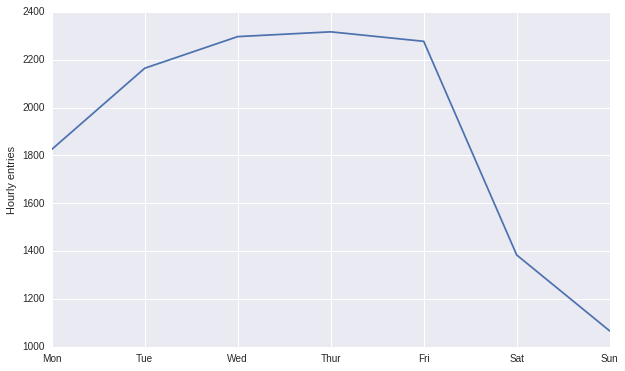

In [78]:
%pylab inline
figsize(10, 6) #Changes plot height and width


import seaborn as sns

ridership_plot = ridership_by_day.plot()
ridership_plot.set_ylabel('Hourly entries')

## 29 - Hourly Entries and Exits

In the quiz where we calculated hourly entries and exits, we did so for a single set of cumulative entries. However, in the original data, there was a separate set of numbers for each station.

Thus, to correctly calculate the hourly entries and exits, it was necessary to group by station and day, then calculate the hourly entries and exits within each day.

So now we are going to write a function to do that.

In [79]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [80]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [81]:
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(get_hourly_entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


We have 2 `NaN`s for 2 stations where we did not have any previous entry to compare it with

## 30 - Combining Pandas DataFrames

In [82]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [83]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on = ['DATEn', 'hour', 'latitude', 'longitude'], how = 'inner')

In [84]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


The 4 columns on which I had to join had the same names. If they had different names we could have used the arguments `left_on` and `right_on` to specify the column names. 

## 32 - Plotting for DataFrames

In [85]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [86]:
subway_df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [87]:
data_by_location = subway_df.groupby(['latitude', 'longitude'],
                                    as_index = False).mean()

data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [88]:
scaled_entries = (data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std())

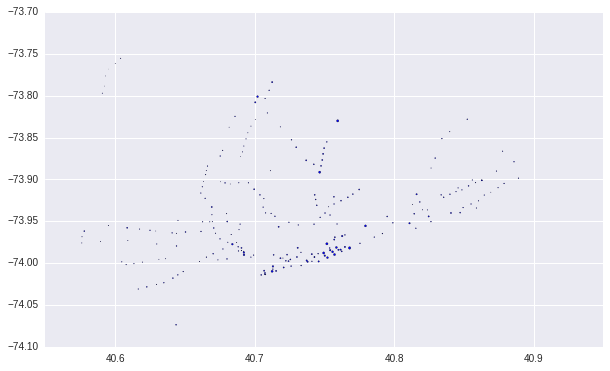

In [89]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
           s = scaled_entries)